# CAC40 Stock Analysis

This notebook analyzes CAC40 stock data from multiple time periods.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

%matplotlib inline


## Load Data


In [ ]:
# Load all CAC40 datasets
df_2010_2021 = pd.read_csv('datasets/cac40 stock/CAC40_stocks_2010_2021.csv')
df_2021_2023 = pd.read_csv('datasets/cac40 stock/CAC40_stocks_2021_2023.csv')
df_preprocessed = pd.read_csv('datasets/cac40 stock/preprocessed_CAC40.csv')

print("Dataset shapes:")
print(f"2010-2021: {df_2010_2021.shape}")
print(f"2021-2023: {df_2021_2023.shape}")
print(f"Preprocessed: {df_preprocessed.shape}")


Dataset shapes:
2010-2021: (81735, 8)
2021-2023: (28564, 8)
Preprocessed: (97648, 8)


## Data Exploration


In [ ]:
# Display first few rows of each dataset
print("\n=== CAC40 Stocks 2010-2021 ===")
display(df_2010_2021.head())
print("\nColumn info:")
df_2010_2021.info()



=== CAC40 Stocks 2010-2021 ===


,CompanyName,StockName,High,Low,Open,Close,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400.0,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600.0,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200.0,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000.0,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400.0,2010-01-08



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81735 entries, 0 to 81734
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CompanyName  81735 non-null  object 
 1   StockName    81735 non-null  object 
 2   High         81735 non-null  float64
 3   Low          81735 non-null  float64
 4   Open         81735 non-null  float64
 5   Close        81735 non-null  float64
 6   Volume       81735 non-null  float64
 7   Date         81735 non-null  object 
dtypes: float64(5), object(3)
memory usage: 5.0+ MB


In [ ]:
print("\n=== CAC40 Stocks 2021-2023 ===")
display(df_2021_2023.head())
print("\nColumn info:")
df_2021_2023.info()



=== CAC40 Stocks 2021-2023 ===


,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
1,2020-04-09,28.629999,29.570000,28.049999,28.639999,28.639999,990955.0,AC.PA
2,2020-04-14,28.010000,28.340000,27.150000,27.590000,27.590000,907178.0,AC.PA
3,2020-04-15,27.170000,27.299999,25.459999,25.660000,25.660000,1378290.0,AC.PA
4,2020-04-16,25.879999,26.700001,24.080000,24.570000,24.570000,1474307.0,AC.PA



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28564 entries, 0 to 28563
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       28564 non-null  object 
 1   Open       28564 non-null  float64
 2   High       28564 non-null  float64
 3   Low        28564 non-null  float64
 4   Close      28564 non-null  float64
 5   Adj Close  28564 non-null  float64
 6   Volume     28564 non-null  float64
 7   Stock      28564 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.7+ MB


In [ ]:
print("\n=== Preprocessed CAC40 ===")
display(df_preprocessed.head())
print("\nColumn info:")
df_preprocessed.info()



=== Preprocessed CAC40 ===


,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97648 entries, 0 to 97647
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     97648 non-null  int64  
 1   Name           97648 non-null  object 
 2   Date           97648 non-null  object 
 3   Open           97418 non-null  float64
 4   Closing_Price  97646 non-null  float64
 5   Daily_High     97444 non-null  float64
 6   Daily_Low      97444 non-null  float64
 7   Volume         77195 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 6.0+ MB


## Statistical Summary


In [ ]:
# Statistical summary
print("Statistical Summary (2010-2021):")
display(df_2010_2021.describe())


Statistical Summary (2010-2021):


,High,Low,Open,Close,Volume
count,81735.000000,81735.000000,81735.000000,81735.000000,8.173500e+04
mean,52.689439,51.763152,52.230574,52.233152,1.504557e+06
std,204.869608,203.886170,204.157064,204.455254,2.705040e+06
min,0.005000,0.005000,0.005000,0.005000,0.000000e+00
25%,17.295000,16.857500,17.060273,17.041016,2.700000e+03
50%,32.599998,32.599998,32.599998,32.599998,3.947270e+05
75%,50.615000,49.441797,50.040001,50.044415,2.014200e+06
max,12650.000000,12203.000000,12203.000000,12529.000000,1.291250e+08


## Data Visualization


In [ ]:
# Check if date column exists and convert to datetime
date_column = None
for col in df_preprocessed.columns:
    if 'date' in col.lower():
        date_column = col
        df_preprocessed[col] = pd.to_datetime(df_preprocessed[col])
        break

if date_column:
    print(f"Found date column: {date_column}")


Found date column: Date


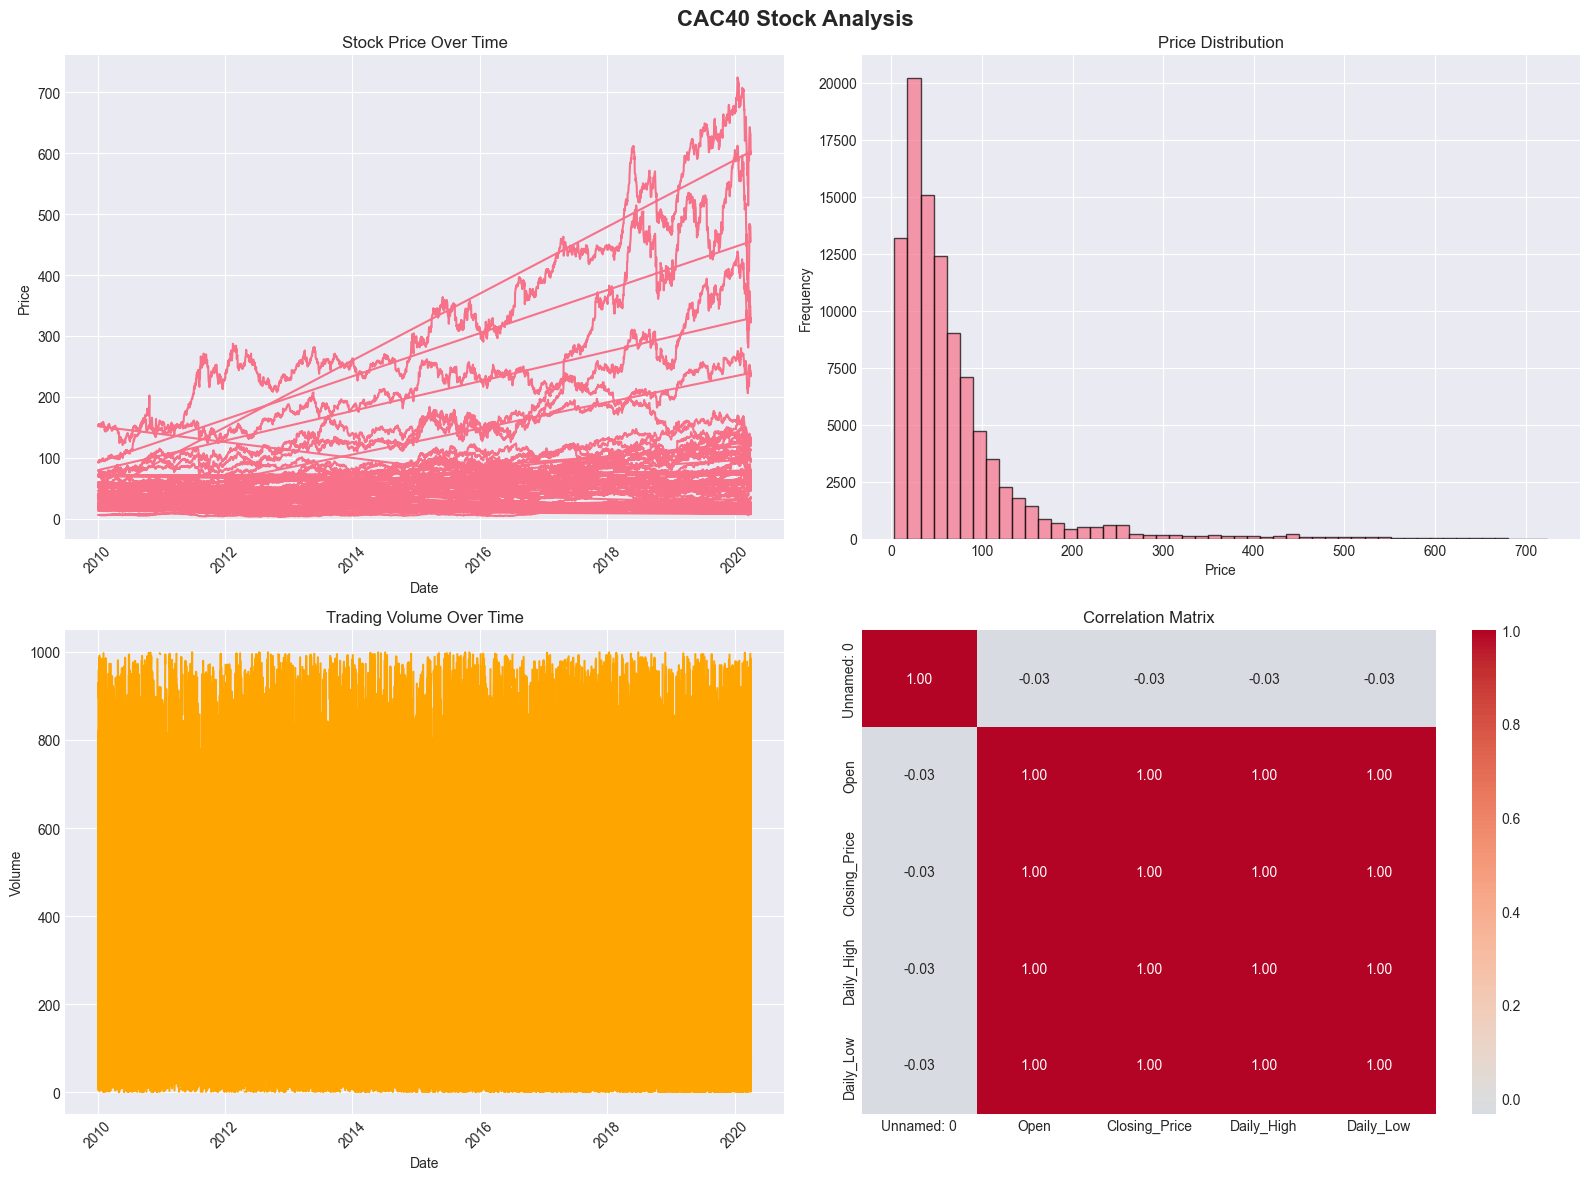

In [ ]:
# Visualize stock prices over time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('CAC40 Stock Analysis', fontsize=16, fontweight='bold')

# Check for price/close columns
price_cols = [col for col in df_preprocessed.columns if any(x in col.lower() for x in ['close', 'price', 'value'])]

if price_cols and date_column:
    # Plot price over time
    ax1 = axes[0, 0]
    ax1.plot(df_preprocessed[date_column], df_preprocessed[price_cols[0]])
    ax1.set_title('Stock Price Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.tick_params(axis='x', rotation=45)

# Distribution plot
if price_cols:
    ax2 = axes[0, 1]
    ax2.hist(df_preprocessed[price_cols[0]].dropna(), bins=50, edgecolor='black', alpha=0.7)
    ax2.set_title('Price Distribution')
    ax2.set_xlabel('Price')
    ax2.set_ylabel('Frequency')

# Volume analysis if available
volume_cols = [col for col in df_preprocessed.columns if 'volume' in col.lower()]
if volume_cols and date_column:
    ax3 = axes[1, 0]
    # Convert volume to numeric to avoid plotting errors
    volume_data = pd.to_numeric(df_preprocessed[volume_cols[0]], errors='coerce')
    ax3.plot(df_preprocessed[date_column], volume_data, color='orange')
    ax3.set_title('Trading Volume Over Time')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Volume')
    ax3.tick_params(axis='x', rotation=45)

# Correlation heatmap
ax4 = axes[1, 1]
numeric_cols = df_preprocessed.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    correlation = df_preprocessed[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', ax=ax4, center=0)
    ax4.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


## Missing Values and Key Insights


In [ ]:
# Check for missing values
print("Missing Values:")
missing = df_preprocessed.isnull().sum()
missing_percent = 100 * missing / len(df_preprocessed)
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percent})
display(missing_df[missing_df['Missing Count'] > 0])

# Calculate key metrics
if price_cols:
    price_col = price_cols[0]
    print("\n=== Key Metrics ===")
    print(f"Average Price: {df_preprocessed[price_col].mean():.2f}")
    print(f"Median Price: {df_preprocessed[price_col].median():.2f}")
    print(f"Price Range: {df_preprocessed[price_col].min():.2f} - {df_preprocessed[price_col].max():.2f}")
    print(f"Standard Deviation: {df_preprocessed[price_col].std():.2f}")
    
    if date_column:
        print(f"\nDate Range: {df_preprocessed[date_column].min()} to {df_preprocessed[date_column].max()}")


Missing Values:


,Missing Count,Percentage
Open,230,0.235540
Closing_Price,2,0.002048
Daily_High,204,0.208914
Daily_Low,204,0.208914
Volume,20453,20.945641



=== Key Metrics ===
Average Price: 68.82
Median Price: 46.98
Price Range: 3.37 - 724.00
Standard Deviation: 77.27

Date Range: 2010-01-04 00:00:00 to 2020-04-03 00:00:00
